In [1]:
import mne
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

directory = "omega"
list_files = []
for filename in os.listdir("omega"):
    f = os.path.join(directory, filename)
    # checking if it is a directory
    if (not os.path.isfile(f)) and (filename != "joblib"):
        f_ses1 = os.path.join(f, "ses-01/meg")
        f_ses2 = os.path.join(f, "ses-02/meg")
        if os.path.isdir(f_ses1):
            if os.listdir(f_ses1):
                f_ses1_ex = os.path.join(f_ses1, f"{filename}_ses-01_task-rest_proc-autoreject_epo.fif")
                list_files.append(f_ses1_ex)
                continue
        if os.path.isdir(f_ses2):
            if os.listdir(f_ses2):
                f_ses2_ex = os.path.join(f_ses2, f"{filename}_ses-02_task-rest_proc-autoreject_epo.fif")
                list_files.append(f_ses2_ex)

In [2]:
epoch_file = mne.read_epochs(list_files[0])
spec = epoch_file.compute_psd().to_data_frame()
freq_list = np.unique(spec['freq'])

# Dictionary for the corresponding label of each subject
dict_labels = pd.read_csv("participants.tsv", delimiter='\t')[['participant_id', 'group', 'sex', 'age']].set_index(['participant_id']).to_dict()
list_subjs = [el.split('/')[1] for el in list_files]
list_labels_group = [dict_labels['group'][el] for el in list_subjs]
list_labels_sex = [dict_labels['sex'][el] for el in list_subjs]
list_labels_age = [dict_labels['sex'][el] for el in list_subjs]

Reading /media/ahmad/Seagate Expansion Drive/Data retreat/omega/sub-0221/ses-01/meg/sub-0221_ses-01_task-rest_proc-autoreject_epo.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =       0.00 ...   10000.00 ms
        5 CTF compensation matrices available
Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated
Removing 5 compensators from info because not all compensation channels were picked.
    Using multitaper spectrum estimation with 7 DPSS windows


In [3]:
# epoch_file = mne.read_epochs(list_files[0])
# spec = epoch_file.compute_psd().to_data_frame()
# subj_nb = len(list_files)
# # epoch_nb = len(np.unique(spec['epoch']))
# freq_nb = len(np.unique(spec['freq']))
# # cap_nb = spec.shape[1] - 3

# spec_sub = np.empty((subj_nb, freq_nb))

# count_sub = 0
# for filename in list_files:
#     print(f"subject:{count_sub+1}")
#     epoch_file = mne.read_epochs(filename)
#     spec = epoch_file.compute_psd().to_data_frame()
#     spec = spec.drop(columns=['condition', 'epoch'])
#     # if len(list(spec.groupby("freq").mean().columns)) != 262:
#     #     print(len(list(spec.groupby("freq").mean().columns)))
#     #     print(spec.groupby("freq").mean().columns)
#     spec_sub[count_sub, :] = spec.groupby("freq").mean().mean(axis=1).to_numpy()
#     count_sub += 1
# pd.DataFrame(spec_sub).to_csv("spectrum_freq_subject.csv", index=False)

In [4]:
spec_sub = pd.read_csv("spectrum_freq_subject.csv").to_numpy()

In [5]:
spec_sub

array([[4.88514565e-23, 9.42084504e-23, 7.98920836e-23, ...,
        2.75407215e-29, 2.75433663e-29, 2.75503844e-29],
       [9.64091697e-23, 1.83058870e-22, 1.53550859e-22, ...,
        4.60726227e-29, 4.60727655e-29, 4.60655023e-29],
       [9.04438197e-25, 1.81921180e-24, 1.71430986e-24, ...,
        1.70413004e-30, 1.70460393e-30, 1.70671243e-30],
       ...,
       [2.54498066e-24, 4.54938363e-24, 4.25595323e-24, ...,
        3.86977416e-30, 3.87187787e-30, 3.87127809e-30],
       [1.06742642e-24, 2.07555824e-24, 1.86578727e-24, ...,
        1.74712018e-30, 1.74639624e-30, 1.74623698e-30],
       [1.28316315e-24, 2.41275743e-24, 2.22266712e-24, ...,
        2.14171604e-30, 2.14318785e-30, 2.14368160e-30]])

In [6]:
# epoch_file = mne.read_epochs(list_files[0])
# spec = epoch_file.compute_psd().to_data_frame()
# spec = spec.drop(columns=['condition', 'epoch'])
# spec

In [7]:
# spec_cur = spec.groupby("freq").mean()
# print(spec_cur)
# spec_cur = spec_cur.mean(axis=1)
# print(spec_cur)
# # spec_cur.to_numpy().shape

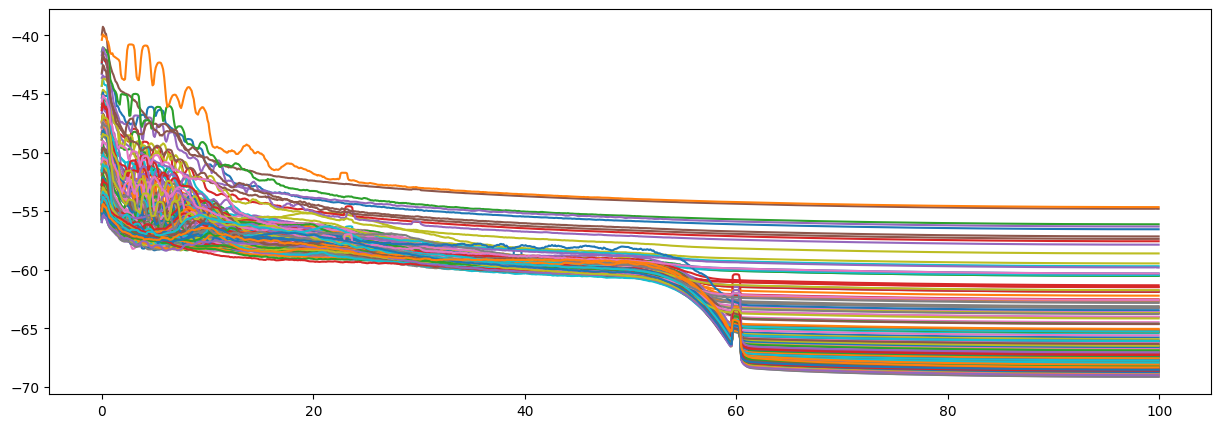

In [8]:
for sub_ind in range(spec_sub.shape[0]):
    plt.plot(freq_list, np.log(spec_sub[sub_ind, :]))
plt.show()

# Male vs Female: Age prediction

In [9]:
male_id = np.where(np.array(list_labels_sex) == "M")[0]
female_id = np.where(np.array(list_labels_sex) == "F")[0]

# Split the subjects between parkinson vs control
spec_sub_male = spec_sub[male_id, :]
spec_sub_female = spec_sub[female_id, :]

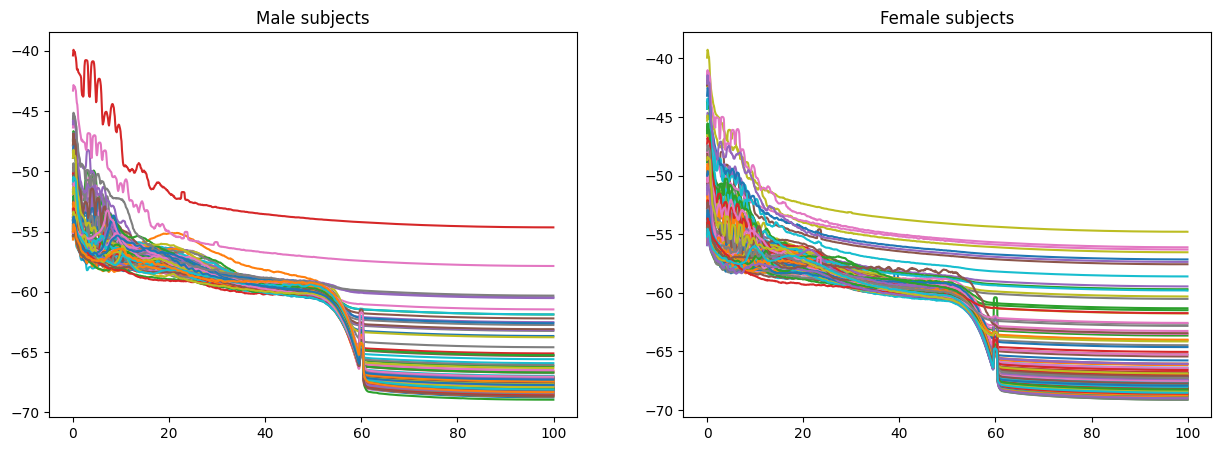

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Male subjects")
for sub_ind in range(spec_sub_male.shape[0]): 
    ax1.plot(freq_list, np.log(spec_sub_male[sub_ind, :]))

ax2.set_title("Female subjects")
for sub_ind in range(spec_sub_female.shape[0]): 
    ax2.plot(freq_list, np.log(spec_sub_female[sub_ind, :]))
plt.show()

# Parkinson vs Control

In [ ]:
len(parkinson_id)

83

In [15]:
len(control_id)

152

In [11]:
parkinson_id = np.where(np.array(list_labels_group) == "Parkinson")[0]
control_id = np.where(np.array(list_labels_group) == "Control")[0]

# Split the subjects between parkinson vs control
spec_sub_parkinson = spec_sub[parkinson_id, :]
spec_sub_control = spec_sub[control_id, :]


In [12]:
freq_list_50 = np.where(freq_list < 50)[0]

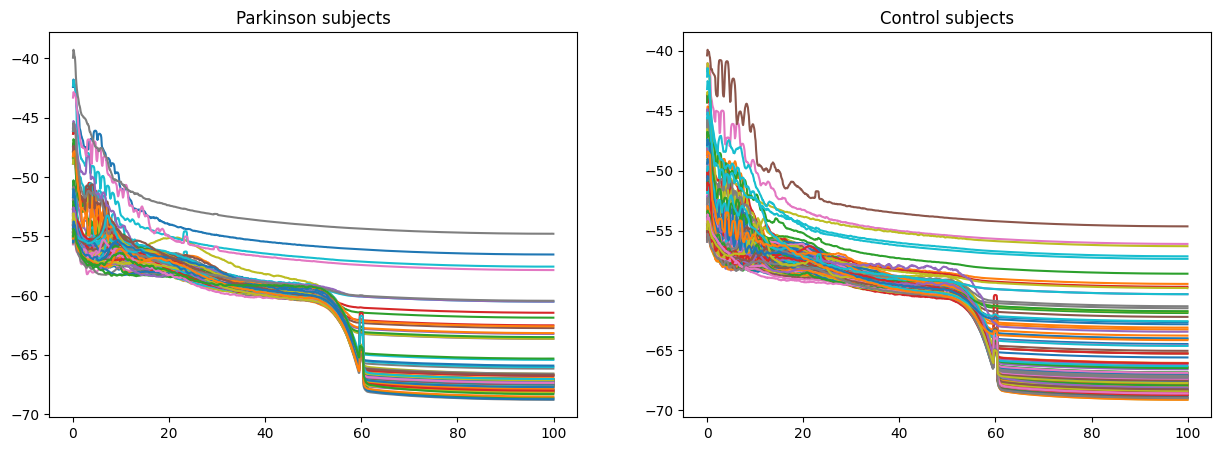

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Parkinson subjects")
for sub_ind in range(spec_sub_parkinson.shape[0]): 
    ax1.plot(freq_list, np.log(spec_sub_parkinson[sub_ind, :]))

ax2.set_title("Control subjects")
for sub_ind in range(spec_sub_control.shape[0]): 
    ax2.plot(freq_list, np.log(spec_sub_control[sub_ind, :]))
plt.show()